In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

# Penetracion Internet Fijo

KPI -> Aumentar en un 2% el acceso al servicio de internet para el próximo trimestre, cada 100 hogares, por provincia.

In [2]:
pe_in = pd.read_csv('https://datosabiertos.enacom.gob.ar/rest/datastreams/275028/data.csv')

In [3]:
pe_in.sample(5)

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
657,2015,4,Jujuy,"21,47"
783,2014,3,Río Negro,"46,2"
432,2018,1,Buenos Aires,"62,63"
711,2015,2,Río Negro,"45,98"
110,2021,3,Neuquén,"69,71"


In [4]:
pe_in.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Año                           840 non-null    int64 
 1   Trimestre                     840 non-null    int64 
 2   Provincia                     840 non-null    object
 3   Accesos por cada 100 hogares  840 non-null    object
dtypes: int64(2), object(2)
memory usage: 26.4+ KB


In [5]:
pe_in_copy = pe_in.copy()

In [6]:
pe_in_copy['Accesos por cada 100 hogares'] = pe_in_copy['Accesos por cada 100 hogares'].str.replace(',', '.').astype(float)
pe_in_copy['Accesos por cada 100 hogares']

0       78.11
1      122.28
2       65.33
3       43.86
4       84.38
        ...  
835     28.94
836     47.85
837     16.31
838     63.97
839     33.42
Name: Accesos por cada 100 hogares, Length: 840, dtype: float64

In [7]:
pe_in_copy.describe()

,Año,Trimestre,Accesos por cada 100 hogares
count,840.000000,840.000000,840.000000
mean,2017.885714,2.457143,49.065750
std,2.528745,1.105009,23.151885
min,2014.000000,1.000000,9.350000
25%,2016.000000,1.000000,32.107500
50%,2018.000000,2.000000,45.900000
75%,2020.000000,3.000000,61.865000
max,2022.000000,4.000000,124.060000


In [8]:
provincia = 'Santiago del estero'
year = 2022

pe_in_copy = pe_in_copy[pe_in_copy.Provincia.str.lower() == provincia.lower()]
pe_in_copy = pe_in_copy[pe_in_copy['Año'] == year]
pe_in_copy.sort_values('Trimestre', ascending=True, inplace=True)
pe_in_copy

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
69,2022,1,Santiago Del Estero,47.17
45,2022,2,Santiago Del Estero,47.70
21,2022,3,Santiago Del Estero,47.98


Porcentajes de aumento entre cuartiles: [1.1235955056179798, 0.5870020964360462]
Promedio de aumento: 0.8552988010270131
Se requieren 3 nuevas conexiones para lograr un aumento de 2% el siguiente trimestre


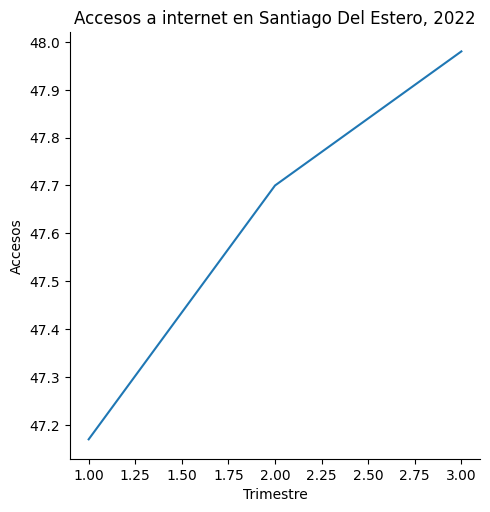

In [10]:
sns.relplot(data = pe_in_copy,
           x = pe_in_copy['Trimestre'],
           y = pe_in_copy['Accesos por cada 100 hogares'],
           kind = 'line',	aspect= 1).set(title = f'Accesos a internet en {provincia.title()}, {year}', ylabel = 'Accesos')

valores = pe_in_copy['Accesos por cada 100 hogares'].values

aumento_accesos = []

for i in range(len(valores) - 1):
    porcentaje = ((valores[i+1] - valores[i]) / valores[i]) * 100
    aumento_accesos.append(porcentaje)
    
promedio = sum(aumento_accesos) / len(aumento_accesos)
KPI1 = 2
meta1 = (sum(valores) * KPI1) / 100

print(f'Porcentajes de aumento entre cuartiles: {aumento_accesos}')
print(f'Promedio de aumento: {promedio}')
print(f'Se requieren {round(meta1)} nuevas conexiones para lograr un aumento de {KPI1}% el siguiente trimestre')

porcentajes de aumento: [2.3911710606989613, -1.2574850299401248, 4.730139478471808]
promedio de aumento: 1.9546085030768816


# ANALIZANDO ACCESOS A INTERNET POR  TECNOLOGIA Y LOCALIDAD

In [6]:
ac_te_lo = pd.read_csv('data/Accesos_a_Internet_fijo_por_tecnologia_y_localidad.csv')

### analizar composicion

In [7]:
ac_te_lo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3142 entries, 0 to 3141
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Provincia      3142 non-null   object 
 1   Partido        3142 non-null   object 
 2   Localidad      3142 non-null   object 
 3   Link Indec     3142 non-null   object 
 4   ADSL           3142 non-null   object 
 5   CABLEMODEM     3142 non-null   object 
 6   DIAL UP        3142 non-null   object 
 7   FIBRA OPTICA   3142 non-null   object 
 8   OTROS          3142 non-null   object 
 9   SATELITAL      3142 non-null   object 
 10  WIMAX          3142 non-null   object 
 11  WIRELESS       3142 non-null   object 
 12  Total general  3142 non-null   object 
 13  Unnamed: 13    0 non-null      float64
dtypes: float64(1), object(13)
memory usage: 343.8+ KB


In [8]:
ac_te_lo.sample(5)

,Provincia,Partido,Localidad,Link Indec,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general,Unnamed: 13
2159,RIO NEGRO,Adolfo Alsina,San Javier,62007080,- 0,- 0,- 0,- 0,- 0,1,- 0,211,212,NaN
851,CHACO,San Fernando,Basail,22140020,98,67,- 0,- 0,- 0,1,- 0,57,223,NaN
1720,LA PAMPA,Guatraché,Alpachiri,42070010,- 0,- 0,- 0,2,- 0,1,- 0,- 0,3,NaN
1993,MENDOZA,Tupungato,La Arboleda,50126040,- 0,- 0,- 0,- 0,- 0,- 0,- 0,45,45,NaN
1693,LA PAMPA,Atreucó,Macachín,42007020,- 0,- 0,- 0,301,- 0,1,- 0,1.004,1.306,NaN


### Analizar datos

#### Provincia

In [9]:
ac_te_lo['Provincia'].sample(5)

1159         CORDOBA
2404        SAN JUAN
2577      SANTA CRUZ
304     BUENOS AIRES
1764        LA PAMPA
Name: Provincia, dtype: object

In [17]:
ac_te_lo['Provincia'].value_counts()

Provincia
BUENOS AIRES           716
CORDOBA                394
SANTA FE               354
ENTRE RIOS             150
MENDOZA                145
SANTIAGO DEL ESTERO    130
SALTA                  123
RIO NEGRO              119
SAN LUIS                97
JUJUY                   95
MISIONES                95
LA PAMPA                82
SAN JUAN                80
LA RIOJA                75
CHACO                   74
CATAMARCA               72
TUCUMAN                 68
CORRIENTES              65
CHUBUT                  63
FORMOSA                 62
NEUQUEN                 53
SANTA CRUZ              22
TIERRA DEL FUEGO         7
CABA                     1
Name: count, dtype: int64

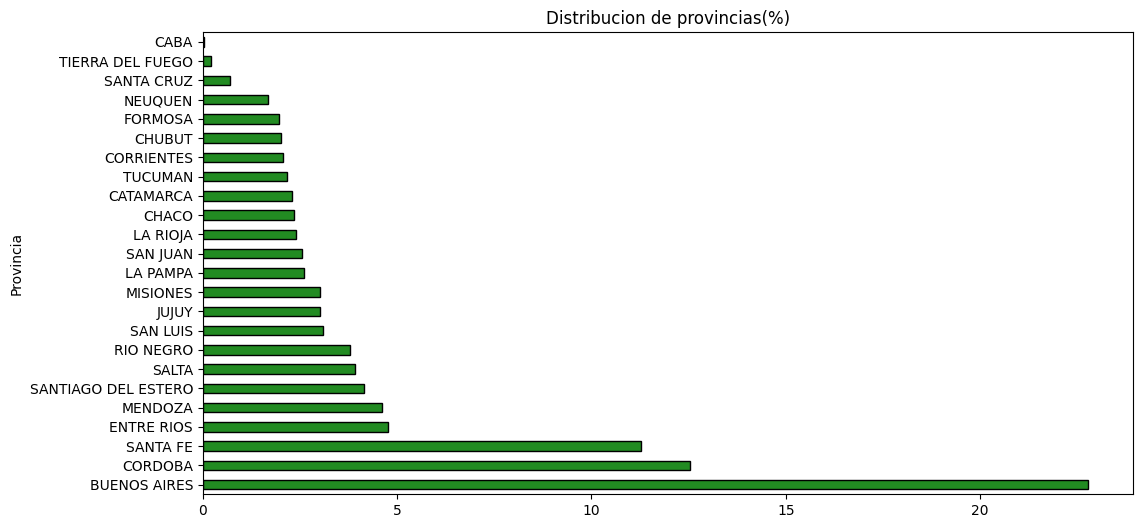

In [15]:
total = len(ac_te_lo['Provincia'])
provincia = ac_te_lo['Provincia']
plot = (100 * provincia.value_counts()/total).plot(kind='barh',
                                                   title = 'Distribucion de provincias(%)',
                                                   figsize=(12,6),
                                                   facecolor='forestgreen',
                                                   edgecolor='black')

#### Partido

In [35]:
ac_te_lo['Partido'].sample(10)

1073                         Pocho
1091                       Punilla
33                 Almirante Brown
2923                          Vera
2045    Libertador Grl. San Martín
3067                    Río Grande
1398                     Concordia
329                       La Costa
1782                 Castro Barros
744                        Capayán
Name: Partido, dtype: object

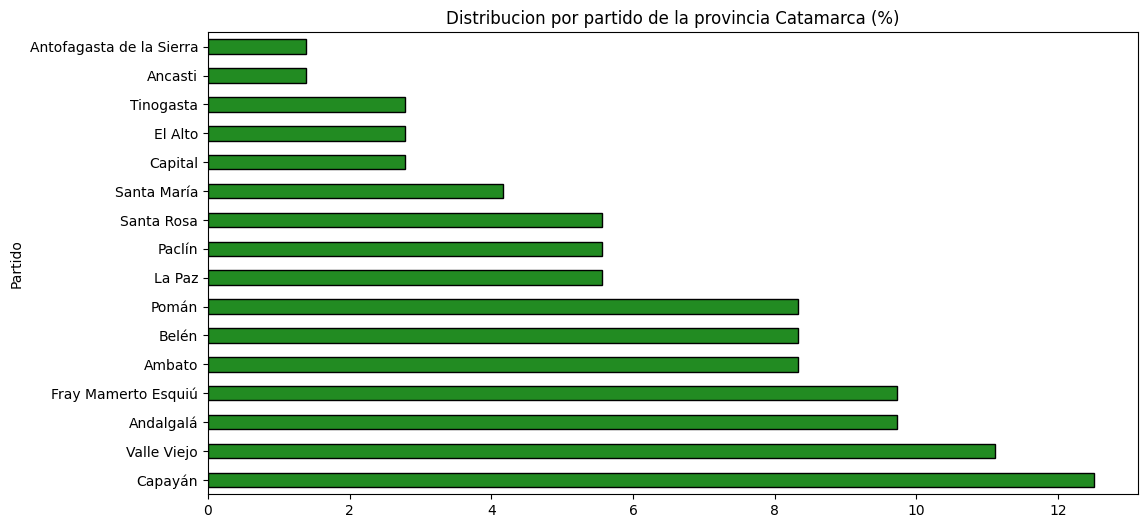

In [57]:
prov = 'catamarca'
temp = ac_te_lo[ac_te_lo['Provincia'] == prov.upper()]

plot = (100 * temp['Partido'].value_counts()/len(temp)).plot(kind='barh',
                                    title=f'Distribucion por partido de la provincia {prov.capitalize()} (%)',
                                    figsize=(12,6),
                                    facecolor='forestgreen',
                                    edgecolor='black')

#### Localidad

In [22]:
ac_te_lo['Localidad'].sample(10)

3129        Amaicha del Valle
3065                   Árraga
397                   Bayauca
1190                   La Paz
942             Villa Amancay
1796                 Guanchín
1011                   Chazón
351              Arturo Segui
2973    Vuelta de la Barranca
2749          Llambi Campbell
Name: Localidad, dtype: object

#### Link Indec

In [23]:
ac_te_lo['Link Indec'].sample(10)

1921    50070060
1003    14035050
1809    46049020
904     26063020
1804    46028050
94       6112010
2810    82084300
1629    38042040
2401    70021020
2510    74042010
Name: Link Indec, dtype: object

In [65]:
ac_te_lo['Link Indec'].value_counts()

Link Indec
Sin Datos    72
6441030      27
6371010      27
6840010      15
6427010      15
             ..
14140420      1
14140440      1
14140390      1
14140150      1
90119030      1
Name: count, Length: 2718, dtype: int64

In [ ]:
ac_te_lo['Link Indec'].replace('Sin Datos', "-1")

# ac_te_lo['Link Indec'] = ac_te_lo['Link Indec'].astype(int)

In [24]:
ac_te_lo['ADSL'].sample(10)

1671      - 0
3140    1.725
2616      - 0
2242      383
1171      - 0
479       205
1711      - 0
880       - 0
2979      - 0
2315      996
Name: ADSL, dtype: object

In [25]:
ac_te_lo['CABLEMODEM'].sample(10)

224        152
2705       - 0
2443       - 0
469        - 0
440        - 0
1136       - 0
381     10.751
3007       - 0
2956       - 0
326         61
Name: CABLEMODEM, dtype: object

In [46]:
ac_te_lo['DIAL UP'].sample(10)

634     - 0
2531    - 0
2114      2
53        2
430       4
731     - 0
1844    - 0
1170    - 0
617     - 0
2960    - 0
Name: DIAL UP, dtype: object

In [50]:
ac_te_lo['FIBRA OPTICA'].sample(10)

2919     27
2720    - 0
2493    - 0
916     - 0
1681    - 0
2490      3
545     197
2273      5
2984    243
594      25
Name: FIBRA OPTICA, dtype: object

In [55]:
ac_te_lo['OTROS'].sample(10)

2162    - 0
2377     50
2204    - 0
129     - 0
2532    - 0
2408    - 0
770     - 0
1515    - 0
1535    - 0
567      40
Name: OTROS, dtype: object

In [62]:
ac_te_lo['SATELITAL'].sample(10)

3113    - 0
280     - 0
2209    - 0
2602    - 0
2115      5
1408    - 0
2291    - 0
1359      1
1563      1
2911    - 0
Name: SATELITAL, dtype: object

In [72]:
ac_te_lo['WIMAX'].sample(10)

649     - 0
2163    - 0
306     - 0
2030    - 0
1701    - 0
1510    - 0
1478    - 0
1939    - 0
3139    - 0
279     - 0
Name: WIMAX, dtype: object

In [73]:
ac_te_lo['WIRELESS'].sample(10)

940     3.079
2100      590
2526       64
682       - 0
2638    1.497
1197       64
1180       20
1066       35
2844      453
2811       25
Name: WIRELESS, dtype: object

In [32]:
ac_te_lo['Total general'].sample(10)

1915       468
1985        21
3119        26
2900       994
2650         1
422      1.059
8       14.605
1246    16.126
2832        37
2242       517
Name: Total general, dtype: object

In [78]:
ac_te_lo.nunique(axis=0)

Provincia          24
Partido           432
Localidad        2850
Link Indec       2718
ADSL              724
CABLEMODEM        693
DIAL UP            86
FIBRA OPTICA      706
OTROS             219
SATELITAL          24
WIMAX              12
WIRELESS          606
Total general    1348
Unnamed: 13         0
dtype: int64